## Tetha x and tetha y for each videos

In [19]:
import cv2
import math as m
import mediapipe as mp

def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

def findAngle(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle_x = m.atan2(delta_y, delta_x)
    angle_y = m.atan2(delta_x, delta_y)
    return m.degrees(angle_x), m.degrees(angle_y)

def write_landmarks_to_csv(landmarks, frame_number, csv_data):
    print(f"Landmark coordinates for frame {frame_number}:")
    for idx, landmark in enumerate(landmarks):
        print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
        csv_data.append([frame_number, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y, landmark.z])
    print("\n")

good_frames = 0
bad_frames  = 0
 
# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX
 
# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)
 
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils


file_name = 'frontal.mp4'
cap = cv2.VideoCapture(file_name)
 
# Meta.
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Video writer.
video_output = cv2.VideoWriter('frontal_output.mp4', fourcc, fps, frame_size)
total_frames = 0
csv_data = []
frame_number = 0
print('Processing..')
while cap.isOpened():
    # Capture frames.
    success, frame = cap.read()
    if not success:
        print("Null.Frames")
        break
    # Get fps.
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Get height and width.
    h, w = frame.shape[:2]

    # Convert the BGR image to RGB.
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image.
    keypoints = pose.process(image)

    # Convert the image back to BGR.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Use lm and lmPose as representative of the following methods.
    lm = keypoints.pose_landmarks
    lmPose = mp_pose.PoseLandmark
   
    
    if keypoints.pose_landmarks:
        # Left knee.
        l_knee_x = int(lm.landmark[lmPose.LEFT_KNEE].x * w)
        l_knee_y = int(lm.landmark[lmPose.LEFT_KNEE].y * h)
        
        # Right knee.
        r_knee_x = int(lm.landmark[lmPose.RIGHT_KNEE].x * w)
        r_knee_y = int(lm.landmark[lmPose.RIGHT_KNEE].y * h)

        # Left ankle.
        l_ankle_x = int(lm.landmark[lmPose.LEFT_ANKLE].x * w)
        l_ankle_y = int(lm.landmark[lmPose.LEFT_ANKLE].y * h)
        
        # Right ankle.
        r_ankle_x = int(lm.landmark[lmPose.RIGHT_ANKLE].x * w)
        r_ankle_y = int(lm.landmark[lmPose.RIGHT_ANKLE].y * h)

        # Calculate distance between left knee and right knee points.
        offset = findDistance(l_knee_x, l_knee_y, r_knee_x, r_knee_y)


        # Calculate angles.
        left_leg_x_angle, left_leg_y_angle = findAngle(l_knee_x, l_knee_y, l_ankle_x, l_ankle_y)
        right_leg_x_angle, right_leg_y_angle = findAngle(r_knee_x, r_knee_y, r_ankle_x, r_ankle_y)

        # Draw landmarks.
        cv2.circle(image, (l_knee_x, l_knee_y), 7, yellow, -1)
        cv2.circle(image, (l_ankle_x, l_ankle_y), 7, yellow, -1)

        cv2.circle(image, (r_knee_x, r_knee_y), 7, yellow, -1)
        cv2.circle(image, (r_ankle_x, r_ankle_y), 7, yellow, -1)

        angle_text_string_left_x = 'left leg X: ' + str(int(left_leg_x_angle))
        angle_text_string_left_y = 'left leg Y: ' + str(int(left_leg_y_angle))
        angle_text_string_right_x = 'right leg X: ' + str(int(right_leg_x_angle))
        angle_text_string_right_y = 'right leg Y: ' + str(int(right_leg_y_angle))

        total_frames += 1
        
        cv2.putText(image, angle_text_string_left_x, (10, 30), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_left_y, (10, 50), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_right_x, (150, 30), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_right_y, (150, 50), font, 0.5, light_green, 2)
        
        # Join landmarks.
        cv2.line(image, (l_knee_x, l_knee_y), (l_ankle_x, l_ankle_y), green, 4)
        cv2.line(image, (r_knee_x, r_knee_y), (r_ankle_x, r_ankle_y), green, 4)
     

    video_output.write(image)
print('Finished.')
cap.release()
video_output.release()

Processing..
Null.Frames
Finished.


In [20]:
import cv2
import math as m
import mediapipe as mp

def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

def findAngle(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle_x = m.atan2(delta_y, delta_x)
    angle_y = m.atan2(delta_x, delta_y)
    return m.degrees(angle_x), m.degrees(angle_y)

def write_landmarks_to_csv(landmarks, frame_number, csv_data):
    print(f"Landmark coordinates for frame {frame_number}:")
    for idx, landmark in enumerate(landmarks):
        print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
        csv_data.append([frame_number, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y, landmark.z])
    print("\n")

good_frames = 0
bad_frames  = 0
 
# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX
 
# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)
 
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils


file_name = 'lateral.mp4'
cap = cv2.VideoCapture(file_name)
 
# Meta.
fps = int(cap.get(cv2.CAP_PROP_FPS))
width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
frame_size = (width, height)
fourcc = cv2.VideoWriter_fourcc(*'mp4v')

# Video writer.
video_output = cv2.VideoWriter('lateral_output.mp4', fourcc, fps, frame_size)
total_frames = 0
csv_data = []
frame_number = 0
print('Processing..')
while cap.isOpened():
    # Capture frames.
    success, frame = cap.read()
    if not success:
        print("Null.Frames")
        break
    # Get fps.
    fps = cap.get(cv2.CAP_PROP_FPS)
    # Get height and width.
    h, w = frame.shape[:2]

    # Convert the BGR image to RGB.
    image = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Process the image.
    keypoints = pose.process(image)

    # Convert the image back to BGR.
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)

    # Use lm and lmPose as representative of the following methods.
    lm = keypoints.pose_landmarks
    lmPose = mp_pose.PoseLandmark
   
    
    if keypoints.pose_landmarks:
        # Left knee.
        l_knee_x = int(lm.landmark[lmPose.LEFT_KNEE].x * w)
        l_knee_y = int(lm.landmark[lmPose.LEFT_KNEE].y * h)
        
        # Right knee.
        r_knee_x = int(lm.landmark[lmPose.RIGHT_KNEE].x * w)
        r_knee_y = int(lm.landmark[lmPose.RIGHT_KNEE].y * h)

        # Left ankle.
        l_ankle_x = int(lm.landmark[lmPose.LEFT_ANKLE].x * w)
        l_ankle_y = int(lm.landmark[lmPose.LEFT_ANKLE].y * h)
        
        # Right ankle.
        r_ankle_x = int(lm.landmark[lmPose.RIGHT_ANKLE].x * w)
        r_ankle_y = int(lm.landmark[lmPose.RIGHT_ANKLE].y * h)

        # Calculate distance between left knee and right knee points.
        offset = findDistance(l_knee_x, l_knee_y, r_knee_x, r_knee_y)


        # Calculate angles.
        left_leg_x_angle, left_leg_y_angle = findAngle(l_knee_x, l_knee_y, l_ankle_x, l_ankle_y)
        right_leg_x_angle, right_leg_y_angle = findAngle(r_knee_x, r_knee_y, r_ankle_x, r_ankle_y)

        # Draw landmarks.
        cv2.circle(image, (l_knee_x, l_knee_y), 7, yellow, -1)
        cv2.circle(image, (l_ankle_x, l_ankle_y), 7, yellow, -1)

        cv2.circle(image, (r_knee_x, r_knee_y), 7, yellow, -1)
        cv2.circle(image, (r_ankle_x, r_ankle_y), 7, yellow, -1)

        angle_text_string_left_x = 'left leg X: ' + str(int(left_leg_x_angle))
        angle_text_string_left_y = 'left leg Y: ' + str(int(left_leg_y_angle))
        angle_text_string_right_x = 'right leg X: ' + str(int(right_leg_x_angle))
        angle_text_string_right_y = 'right leg Y: ' + str(int(right_leg_y_angle))

        total_frames += 1
        
        cv2.putText(image, angle_text_string_left_x, (10, 30), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_left_y, (10, 50), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_right_x, (150, 30), font, 0.5, light_green, 2)
        cv2.putText(image, angle_text_string_right_y, (150, 50), font, 0.5, light_green, 2)
        
        # Join landmarks.
        cv2.line(image, (l_knee_x, l_knee_y), (l_ankle_x, l_ankle_y), green, 4)
        cv2.line(image, (r_knee_x, r_knee_y), (r_ankle_x, r_ankle_y), green, 4)
     

    video_output.write(image)
print('Finished.')
cap.release()
video_output.release()

Processing..
Null.Frames
Finished.


## Rotation matrix, e and phi

In [21]:
import cv2
import math as m
import mediapipe as mp
import numpy as np
import matplotlib.pyplot as plt

def findDistance(x1, y1, x2, y2):
    dist = m.sqrt((x2-x1)**2+(y2-y1)**2)
    return dist

def findAngle(x1, y1, x2, y2):
    delta_x = x2 - x1
    delta_y = y2 - y1
    angle_x = m.atan2(delta_y, delta_x)
    angle_y = m.atan2(delta_x, delta_y)
    return m.degrees(angle_x), m.degrees(angle_y)

def write_landmarks_to_csv(landmarks, frame_number, csv_data):
    print(f"Landmark coordinates for frame {frame_number}:")
    for idx, landmark in enumerate(landmarks):
        print(f"{mp_pose.PoseLandmark(idx).name}: (x: {landmark.x}, y: {landmark.y}, z: {landmark.z})")
        csv_data.append([frame_number, mp_pose.PoseLandmark(idx).name, landmark.x, landmark.y, landmark.z])
    print("\n")

# Font type.
font = cv2.FONT_HERSHEY_SIMPLEX
 
# Colors.
blue = (255, 127, 0)
red = (50, 50, 255)
green = (127, 255, 0)
dark_blue = (127, 20, 0)
light_green = (127, 233, 100)
yellow = (0, 255, 255)
pink = (255, 0, 255)
 
# Initialize mediapipe pose class.
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

# OpenCV video capture for video 1
file_name_1 = 'frontal.mp4'
cap_1 = cv2.VideoCapture(file_name_1)

# OpenCV video capture for video 2
file_name_2 = 'lateral.mp4'
cap_2 = cv2.VideoCapture(file_name_2)

# Meta for video 1.
fps_1 = int(cap_1.get(cv2.CAP_PROP_FPS))
width_1 = int(cap_1.get(cv2.CAP_PROP_FRAME_WIDTH))
height_1 = int(cap_1.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Meta for video 2.
fps_2 = int(cap_2.get(cv2.CAP_PROP_FPS))
width_2 = int(cap_2.get(cv2.CAP_PROP_FRAME_WIDTH))
height_2 = int(cap_2.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Ensure videos have the same number of frames.
total_frames = min(int(cap_1.get(cv2.CAP_PROP_FRAME_COUNT)), int(cap_2.get(cv2.CAP_PROP_FRAME_COUNT)))

# Video writer.
fourcc = cv2.VideoWriter_fourcc(*'mp4v')
frame_size = (width_1, height_1)
video_output = cv2.VideoWriter('output.mp4', fourcc, fps_1, frame_size)

theta_left_values = []
psi_left_values = []
theta_right_values = []
psi_right_values = []
phi_left_values = []
phi_right_values = []     
    
frames = 0
print('Processing..')
for frame_number in range(total_frames):
    # Capture frames from both videos.
    success_1, frame_1 = cap_1.read()
    success_2, frame_2 = cap_2.read()

    # Break the loop when either of the videos ends.
    if not (success_1 and success_2):
        break

    # Convert the BGR image to RGB.
    image_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2RGB)
    image_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2RGB)
    # Process the image.
    keypoints_1 = pose.process(image_1)
    keypoints_2 = pose.process(image_2)

    # Convert the image back to BGR.
    image_1 = cv2.cvtColor(image_1, cv2.COLOR_RGB2BGR)
    image_2 = cv2.cvtColor(image_2, cv2.COLOR_RGB2BGR)
    # Use lm and lmPose as representative of the following methods.
    lm_1 = keypoints_1.pose_landmarks
    lm_2 = keypoints_2.pose_landmarks
    lmPose = mp_pose.PoseLandmark

    if keypoints.pose_landmarks:
        # Left knee.
        l_knee_x_1 = int(lm_1.landmark[lmPose.LEFT_KNEE].x * w)
        l_knee_y_1 = int(lm_1.landmark[lmPose.LEFT_KNEE].y * h)
        l_knee_x_2 = int(lm_2.landmark[lmPose.LEFT_KNEE].x * w)
        l_knee_y_2 = int(lm_2.landmark[lmPose.LEFT_KNEE].y * h)
        # Right knee.
        r_knee_x_1 = int(lm_1.landmark[lmPose.RIGHT_KNEE].x * w)
        r_knee_y_1 = int(lm_1.landmark[lmPose.RIGHT_KNEE].y * h)
        r_knee_x_2 = int(lm_2.landmark[lmPose.RIGHT_KNEE].x * w)
        r_knee_y_2 = int(lm_2.landmark[lmPose.RIGHT_KNEE].y * h)
        # Left ankle.
        l_ankle_x_1 = int(lm_1.landmark[lmPose.LEFT_ANKLE].x * w)
        l_ankle_y_1 = int(lm_1.landmark[lmPose.LEFT_ANKLE].y * h)
        l_ankle_x_2 = int(lm_2.landmark[lmPose.LEFT_ANKLE].x * w)
        l_ankle_y_2 = int(lm_2.landmark[lmPose.LEFT_ANKLE].y * h)
        # Right ankle.
        r_ankle_x_1 = int(lm_1.landmark[lmPose.RIGHT_ANKLE].x * w)
        r_ankle_y_1 = int(lm_1.landmark[lmPose.RIGHT_ANKLE].y * h)
        r_ankle_x_2 = int(lm_2.landmark[lmPose.RIGHT_ANKLE].x * w)
        r_ankle_y_2 = int(lm_2.landmark[lmPose.RIGHT_ANKLE].y * h)

        # Calculate angles.
        left_leg_x_angle_1, left_leg_y_angle_1 = findAngle(l_knee_x_1, l_knee_y_1, l_ankle_x_1, l_ankle_y_1)
        right_leg_x_angle_1, right_leg_y_angle_1 = findAngle(r_knee_x_1, r_knee_y_1, r_ankle_x_1, r_ankle_y_1)
        left_leg_x_angle_2, left_leg_y_angle_2 = findAngle(l_knee_x_2, l_knee_y_2, l_ankle_x_2, l_ankle_y_2)
        right_leg_x_angle_2, right_leg_y_angle_2 = findAngle(r_knee_x_2, r_knee_y_2, r_ankle_x_2, r_ankle_y_2)
        tetha_left = left_leg_y_angle_2
        psi_left = left_leg_x_angle_1
        tetha_right = right_leg_y_angle_2
        psi_right = right_leg_x_angle_1
        
        theta_left_values.append(tetha_left)
        psi_left_values.append(psi_left)
        theta_right_values.append(tetha_right)
        psi_right_values.append(psi_right)
        phi_left_values.append(phi_left)
        phi_right_values.append(phi_right)
        

        Rotation_Matrix_left = np.array([
        [np.cos(tetha_left)*np.cos(psi_left), -np.cos(tetha_left)*np.sin(psi_left), np.sin(tetha_left)],
        [np.sin(psi_left), np.cos(psi_left), 0],
        [-np.sin(tetha_left)*np.cos(psi_left), np.sin(tetha_left)*np.sin(psi_left), np.cos(tetha_left)]
    ])

        Rotation_Matrix_right = np.array([
        [np.cos(tetha_right)*np.cos(psi_right), -np.cos(tetha_right)*np.sin(psi_right), np.sin(tetha_right)],
        [np.sin(psi_right), np.cos(psi_right), 0],
        [-np.sin(tetha_right)*np.cos(psi_right), np.sin(tetha_right)*np.sin(psi_right), np.cos(tetha_right)]
    ])
        
        phi_right = np.arccos((1-Rotation_Matrix_right.trace())/2)
        phi_left  = np.arccos((1-Rotation_Matrix_left.trace())/2)
        e_right = np.array([[Rotation_Matrix_right[2][1] - Rotation_Matrix_right[1][2]], 
                            [Rotation_Matrix_right[0][2] - Rotation_Matrix_right[2][0]], 
                            [Rotation_Matrix_right[1][0] - Rotation_Matrix_right[0][1]]]) / (2 * np.sin(phi_right))

        e_left = np.array([[Rotation_Matrix_left[2][1] - Rotation_Matrix_left[1][2]], 
                        [Rotation_Matrix_left[0][2] - Rotation_Matrix_left[2][0]], 
                        [Rotation_Matrix_left[1][0] - Rotation_Matrix_left[0][1]]]) / (2 * np.sin(phi_left))
        

        # Draw landmarks.
        cv2.circle(image_1, (l_knee_x_1, l_knee_y_1), 7, yellow, -1)
        cv2.circle(image_1, (l_ankle_x_1, l_ankle_y_1), 7, yellow, -1)


        cv2.circle(image_1, (r_knee_x_1, r_knee_y_1), 7, yellow, -1)
        cv2.circle(image_1, (r_ankle_x_1, r_ankle_y_1), 7, yellow, -1)

        angle_text_string_left_x = 'left X: ' + str(int(left_leg_x_angle_1))
        angle_text_string_left_y = 'left Y: ' + str(int(left_leg_y_angle_2))
        angle_text_string_right_x = 'right X: ' + str(int(right_leg_x_angle_1))
        angle_text_string_right_y = 'right Y: ' + str(int(right_leg_y_angle_2))
        phi_right_text = 'Right Phi: ' + str(int(phi_right))
        phi_left_text = 'Left Phi: ' + str(int(phi_left))
        e_right_text = 'Right e: ' + np.array2string(e_right)
        e_left_text = 'Left e: ' + np.array2string(e_left)

        frames += 1
        
        cv2.putText(image_1, angle_text_string_left_x, (10, 30), font, 0.5, red, 1)
        cv2.putText(image_1, angle_text_string_left_y, (10, 50), font, 0.5, red, 1)
        cv2.putText(image_1, angle_text_string_right_x, (150, 30), font, 0.5, green, 1)
        cv2.putText(image_1, angle_text_string_right_y, (150, 50), font, 0.5, green, 1)
        cv2.putText(image_1, phi_right_text, (150, 130), font, 0.5, green, 1)
        cv2.putText(image_1, phi_left_text, (0, 130), font, 0.5, red, 1)
        cv2.putText(image_1, e_left_text, (0, 150), font, 0.5, red, 1)
        cv2.putText(image_1, e_right_text, (0, 170), font, 0.5, green, 1)

        rotation_matrix_text_left = "Rotation Matrix Left:"
        for row in Rotation_Matrix_left:
            for element in row:
                rotation_matrix_text_left += f"{element:.2f} "
            rotation_matrix_text_left += '\n'
        cv2.putText(image_1, rotation_matrix_text_left, (0, 90), font, 0.5, red, 1)


        rotation_matrix_text_right = "Rotation Matrix Right:"
        for row in Rotation_Matrix_right:
            for element in row:
                rotation_matrix_text_right += f"{element:.2f} "
            rotation_matrix_text_right += '\n'
        cv2.putText(image_1, rotation_matrix_text_right, (0, 110), font, 0.5, green, 1)

        # Join landmarks.
        cv2.line(image_1, (l_knee_x_1, l_knee_y_1), (l_ankle_x_1, l_ankle_y_1), red, 4)
        cv2.line(image_1, (r_knee_x_1, r_knee_y_1), (r_ankle_x_1, r_ankle_y_1), green, 4)

    video_output.write(image_1)
print('Finished.')
cap.release()
video_output.release()

Processing..
Finished.


## Plotting

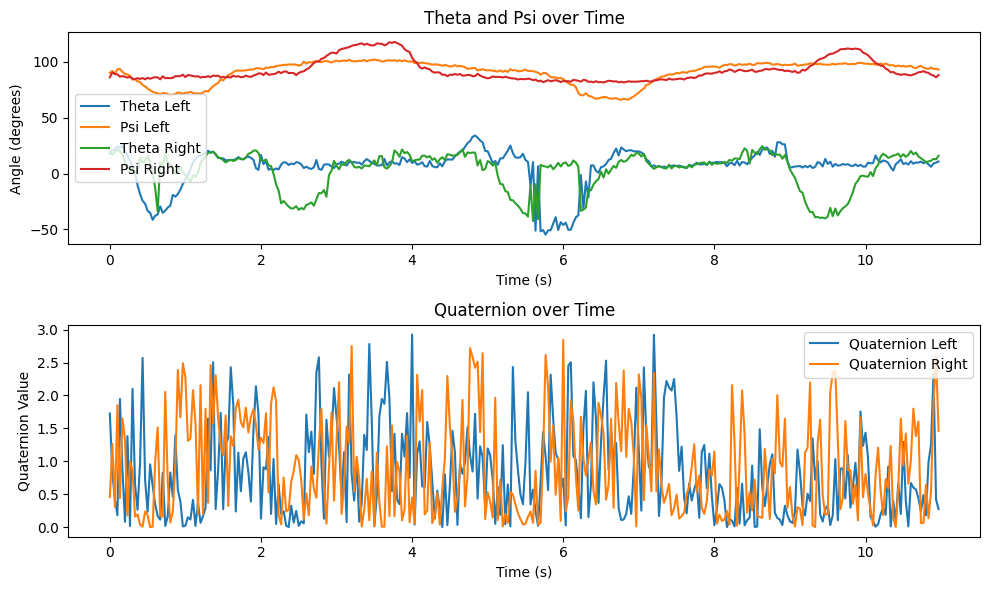

In [22]:
# Calculate time per frame
total_duration = 11  # Total duration of the video in seconds
total_frames = 330  # Total number of frames in the video
time_per_frame = total_duration / total_frames

# Create time array
time_values = np.arange(0, total_duration, time_per_frame)

# Plotting
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_values, theta_left_values, label='Theta Left')
plt.plot(time_values, psi_left_values, label='Psi Left')
plt.plot(time_values, theta_right_values, label='Theta Right')
plt.plot(time_values, psi_right_values, label='Psi Right')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Theta and Psi over Time')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(time_values, phi_left_values, label='Quaternion Left')
plt.plot(time_values, phi_right_values, label='Quaternion Right')
plt.xlabel('Time (s)')
plt.ylabel('Quaternion Value')
plt.title('Quaternion over Time')
plt.legend()
plt.tight_layout()
plt.show()


## Smoothening

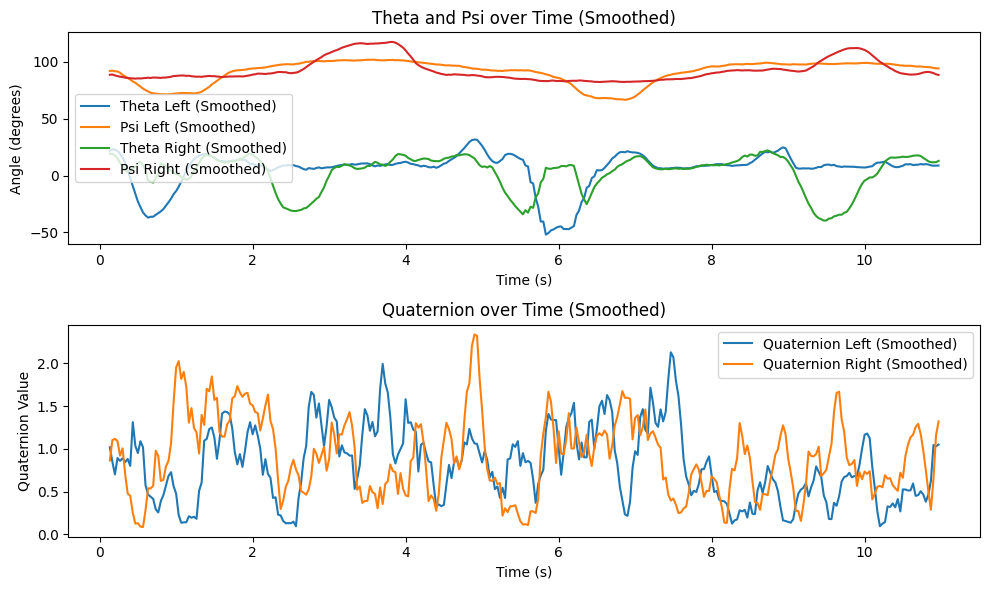

In [23]:
# Save the data to a file
np.savetxt('pose_data.csv', np.column_stack((time_values, theta_left_values, psi_left_values, theta_right_values, psi_right_values, phi_left_values, phi_right_values)), delimiter=',')

# Perform offline smoothing using moving average
window_size = 5
theta_left_smooth = np.convolve(theta_left_values, np.ones(window_size)/window_size, mode='valid')
psi_left_smooth = np.convolve(psi_left_values, np.ones(window_size)/window_size, mode='valid')
theta_right_smooth = np.convolve(theta_right_values, np.ones(window_size)/window_size, mode='valid')
psi_right_smooth = np.convolve(psi_right_values, np.ones(window_size)/window_size, mode='valid')
phi_left_smooth = np.convolve(phi_left_values, np.ones(window_size)/window_size, mode='valid')
phi_right_smooth = np.convolve(phi_right_values, np.ones(window_size)/window_size, mode='valid')

# Replot the smoothed results
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time_values[window_size-1:], theta_left_smooth, label='Theta Left (Smoothed)')
plt.plot(time_values[window_size-1:], psi_left_smooth, label='Psi Left (Smoothed)')
plt.plot(time_values[window_size-1:], theta_right_smooth, label='Theta Right (Smoothed)')
plt.plot(time_values[window_size-1:], psi_right_smooth, label='Psi Right (Smoothed)')
plt.xlabel('Time (s)')
plt.ylabel('Angle (degrees)')
plt.title('Theta and Psi over Time (Smoothed)')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(time_values[window_size-1:], phi_left_smooth, label='Quaternion Left (Smoothed)')
plt.plot(time_values[window_size-1:], phi_right_smooth, label='Quaternion Right (Smoothed)')
plt.xlabel('Time (s)')
plt.ylabel('Quaternion Value')
plt.title('Quaternion over Time (Smoothed)')
plt.legend()
plt.tight_layout()
plt.show()